In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
import warnings
from src.category_classification.helper_methods import preprocess_data

from src.category_classification.train_mutliclass import MultiClassSeismicEventTrainer, SeismicEvents

warnings.filterwarnings('ignore')

In [2]:
np.random.seed(42)

In [5]:
DATA_CSV_PATH = "../data/raw/final_seismic_data.csv"

df = pd.read_csv(DATA_CSV_PATH)

X, y = preprocess_data(df, multiclass=True)

Handling missing values...

Final dataset shape: (17135, 6)
Features used: ['mag', 'depth', 'nst', 'gap', 'longitude', 'latitude']
Number of samples: 17135


In [7]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = RandomForestClassifier(
    n_estimators=200,          
    max_depth=20,              
    min_samples_split=5,       
    min_samples_leaf=2,        
    class_weight='balanced',   
    random_state=42,    
    n_jobs=-1,                 
    verbose=1                  
)
trainer = MultiClassSeismicEventTrainer(model, model_name="multiclass_seismic_classifier", scaler=scaler)

print(f"Training data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")
print(f"Validation data shape: {X_val.shape}")

Training data shape: (10966, 6)
Test data shape: (3427, 6)
Validation data shape: (2742, 6)


In [8]:
trainer.train(X_train, y_train, X_val, y_val)


model_path, scaler_path = trainer.save_model("models")


TRAINING MULTI-CLASS SEISMIC EVENT CLASSIFIER

Training samples: 10966
Class distribution:
  EARTHQUAKE: 6,400 (58.36%)
  EXPLOSION: 4,193 (38.24%)
  NATURAL_EVENT: 142 (1.29%)
  MINING_ACTIVITY: 94 (0.86%)
  OTHER: 78 (0.71%)
  VOLCANIC: 59 (0.54%)

Applying StandardScaler...

Training model...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s



Training completed!
Training Accuracy: 0.9977
Training Precision (weighted): 0.9978
Training Recall (weighted): 0.9977
Training F1-Score (weighted): 0.9977

Validation Accuracy: 0.9909
Validation Precision (weighted): 0.9907
Validation Recall (weighted): 0.9909
Validation F1-Score (weighted): 0.9907

Model saved to: models/multiclass_seismic_classifier.joblib
Scaler saved to: models/multiclass_seismic_classifier_scaler.joblib


[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.2s finished


In [14]:
eval = trainer.evaluate(X_test, y_test)


EVALUATING MULTI-CLASS CLASSIFIER

Making predictions...


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s



TEST SET METRICS
Accuracy: 0.9915

Precision (macro avg): 0.9415
Precision (weighted avg): 0.9918

Recall (macro avg): 0.9294
Recall (weighted avg): 0.9915

F1-Score (macro avg): 0.9337
F1-Score (weighted avg): 0.9916

AUC-ROC (OvR weighted): 0.9998
MCC: 0.9835 (Matthews Correlation Coefficient)

PER-CLASS METRICS
EARTHQUAKE:
  Precision: 0.9970
  Recall: 0.9940
  F1-Score: 0.9955
EXPLOSION:
  Precision: 0.9902
  Recall: 0.9977
  F1-Score: 0.9939
NATURAL_EVENT:
  Precision: 0.9474
  Recall: 0.8182
  F1-Score: 0.8780
MINING_ACTIVITY:
  Precision: 1.0000
  Recall: 0.9333
  F1-Score: 0.9655
OTHER:
  Precision: 0.7143
  Recall: 0.8333
  F1-Score: 0.7692
VOLCANIC:
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

DETAILED CLASSIFICATION REPORT
                 precision    recall  f1-score   support

     EARTHQUAKE       1.00      0.99      1.00      2000
      EXPLOSION       0.99      1.00      0.99      1310
  NATURAL_EVENT       0.95      0.82      0.88        44
MINING_ACTIVIT

[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.2s finished


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.2s finished


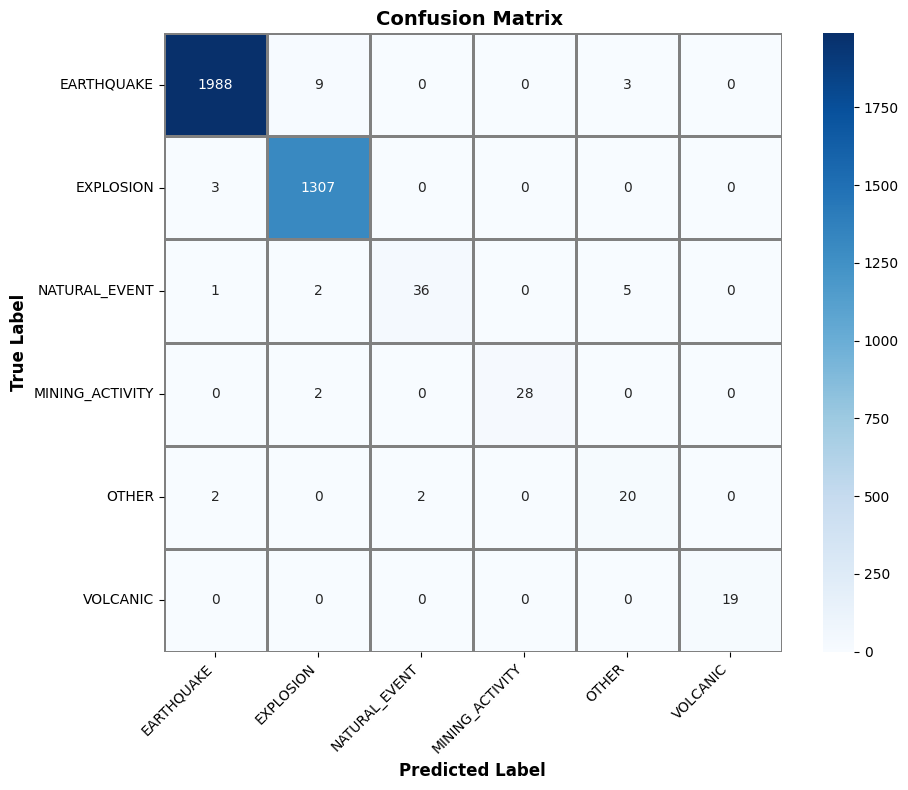

In [11]:
trainer.plot_confusion_matrix(X_test, y_test)

In [13]:
display(trainer.get_feature_importance(["mag", "depth", "nst", "gap", "longitude", "latitude"]))

,feature,importance
1,depth,0.295198
4,longitude,0.252628
5,latitude,0.241056
0,mag,0.138803
3,gap,0.050337
2,nst,0.021978
